### Tutorial 13  KMeans clustering Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('tutorial13_income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


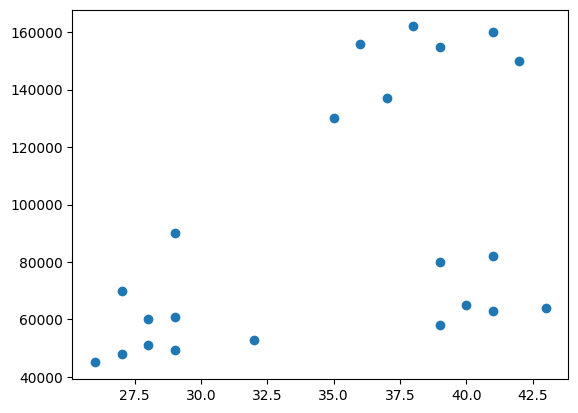

In [6]:
plt.scatter(df['Age'], df['Income($)'])

##### above seems like 3 cluster. So we can use 3 for now. Later below we can see how we can find the number K as 3

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [12]:
df['predicted'] = y_predicted
df.head()

,Name,Age,Income($),predicted
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [13]:
df1 = df[df.predicted==0]
df2 = df[df.predicted==1]
df3 = df[df.predicted==2]


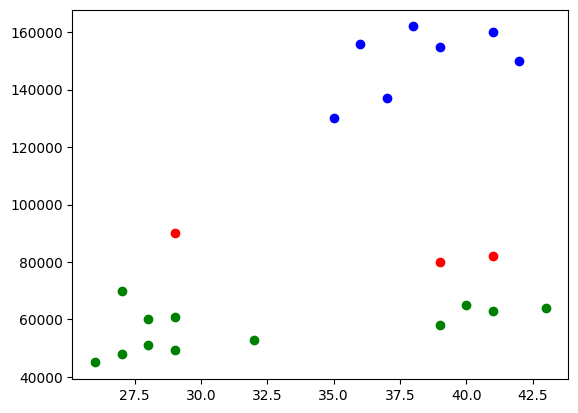

In [14]:
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(df3['Age'], df3['Income($)'], color='green')

##### Even in above there are 3 cluster, red values seems like in 2 cluster.
##### We can use least value as min as 0 and max value as the max as 1, then we can plat and see

In [17]:
scaler = MinMaxScaler()           # this will be used to take in the range of 0 to 1. 0 as min and max as 1 and other values will be between 0 and 1
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),predicted
0,Rob,27,0.213675,2
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [18]:
# Doing the same for age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),predicted
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [21]:
df['predicted'] = y_predicted

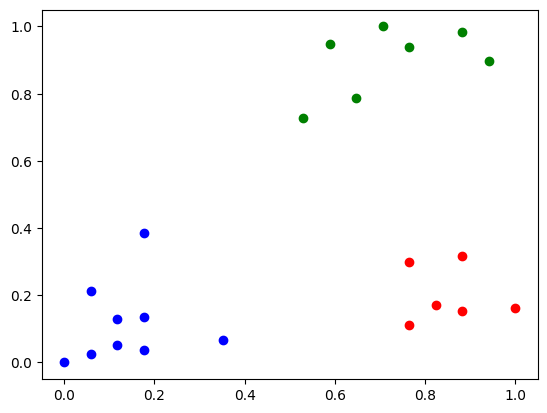

In [22]:
df1 = df[df.predicted==0]
df2 = df[df.predicted==1]
df3 = df[df.predicted==2]
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(df3['Age'], df3['Income($)'], color='green')

##### In above few steps we can see it shows correctly after using MinMaxScaler and then KMean

In [23]:
km.cluster_centers_   # This will give center(centroid) point of each cluster

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

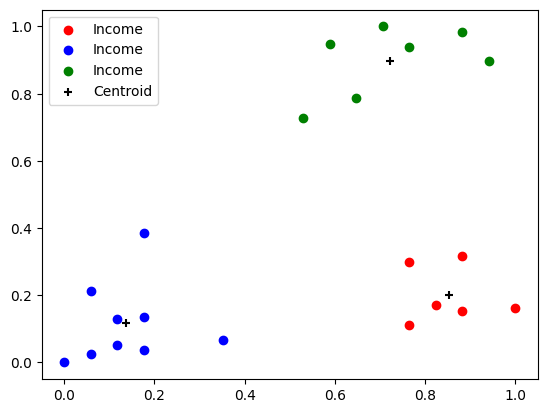

In [25]:
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Income')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Income')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Income')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='+', label='Centroid') 
plt.legend()

#### Below we can use the logic to find the K number using elbo method

In [40]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)   #km.inertia will give the sum of square error

In [41]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.3625079900797329,
 0.3510596000355858,
 0.27843837154851664,
 0.2100532872562122,
 0.14090581089405507,
 0.11073569527418642]

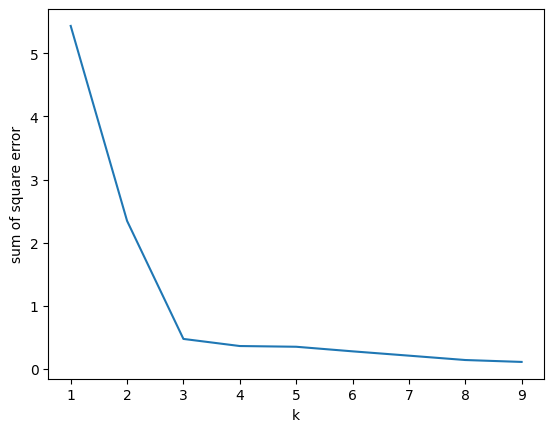

In [44]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng, sse)

##### As per above image 3 is the elbo point. This is the way we can find k number